In [1]:
from pandas import *
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib_venn import venn2
from numpy import *

<AxesSubplot:xlabel='age'>

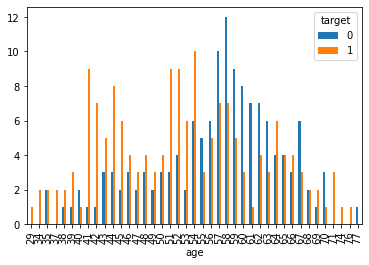

In [2]:
df = read_csv('heart.csv')
df.groupby('target').mean()
crosstab(df.age,df.target).plot(kind='bar')

In [3]:
X = df.iloc[:, 1:]

In [4]:
y = df.loc[:, 'trestbps']

In [5]:
subdf = df[['age','gender','cp','trestbps','chol','thalach']]

In [6]:
gender_dummies = get_dummies(subdf.gender, prefix="Gender")
df_with_dummies = concat([subdf,gender_dummies],axis='columns')
df_with_dummies.head()

,age,gender,cp,trestbps,chol,thalach,Gender_0,Gender_1
0,63,1,3,145,233,150,0,1
1,37,1,2,130,250,187,0,1
2,41,0,1,130,204,172,1,0
3,56,1,1,120,236,178,0,1
4,57,0,0,120,354,163,1,0


In [7]:
df_with_dummies.drop('gender',axis='columns',inplace=True)
df_with_dummies.head()

,age,cp,trestbps,chol,thalach,Gender_0,Gender_1
0,63,3,145,233,150,0,1
1,37,2,130,250,187,0,1
2,41,1,130,204,172,1,0
3,56,1,120,236,178,0,1
4,57,0,120,354,163,1,0


In [8]:
X = df_with_dummies
X.head()
y = df.target

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled, y, test_size=0.3, random_state=200)


In [12]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
# training the model
clf.fit(X_train, y_train)

clf

LogisticRegression()

In [13]:
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1], dtype=int64)

In [14]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 80.22%


Text(0.5, 1.0, 'Confusion Matrix')

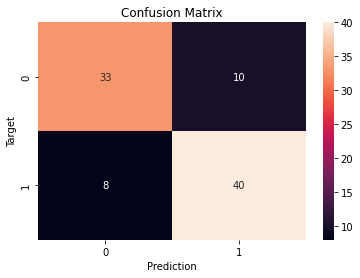

In [15]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

In [17]:
age = int(input('Enter age:'))
gender = int(input('Enter gender:'))
cp = int(input('Enter cp:'))
chol = int(input('Enter chol:'))
trestbps = int(input('Enter trestbps:'))
thalach = int(input('Enter thalach:'))

if gender == 1:
    c = array([age,cp,trestbps,chol,thalach,1,0])
else:
    c = array([age,cp,trestbps,chol,thalach,0,1])

c = c.reshape(1,7)

answer = clf.predict(c)
if answer == 1:
    message = "There are high chances that you might be suffering from a heart disease. To be sure get checked by a Cardiologist."
else:
    message = "There are low chances that you are suffereing from a heart disease.\nJust to be sure, contact your family doctor or make an appointment to a General Physicial who will guide you"
print(message)

Enter age:42
Enter gender:1
Enter cp:2
Enter chol:257
Enter trestbps:190
Enter thalach:152
There are low chances that you are suffereing from a heart disease.
Just to be sure, contact your family doctor or make an appointment to a General Physicial who will guide you
